In [5]:
import pandas as pd 
import numpy as np
import matplotlib as mp 
import seaborn as sb
import sklearn as sk

In [11]:
data = pd.read_csv(r"C:\Users\dell\Downloads\ADANI_PORTS.csv")

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,28-11-2007,194.000000,197.800003,174.929993,177.000000,162.836975,21958915.0,183.243332
1,29-11-2007,181.000000,182.800003,168.460007,177.399994,163.204971,25616715.0,176.2200013
2,30-11-2007,178.000000,191.399994,178.000000,185.800003,170.932831,23047035.0,185.0666657
3,03-12-2007,187.949997,198.860001,184.399994,196.000000,180.316635,14578850.0,193.086665
4,04-12-2007,197.350006,211.000000,195.199997,209.800003,193.012466,22742860.0,205.3333333


In [15]:
data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
VWAP         0
dtype: int64

In [17]:
data.shape

(3842, 8)

In [19]:
data[data.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP


In [21]:
data.nunique()

Date         3842
Open         2635
High         2928
Low          2920
Close        3158
Adj Close    3597
Volume       3827
VWAP         3697
dtype: int64

In [29]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3.835000e+03
mean,314.042678,319.182511,308.187410,313.504360,305.310700,4.126875e+06
std,213.304552,216.079352,209.839672,212.785102,213.963281,6.056481e+06
min,51.400002,52.509998,50.730000,51.590000,47.585068,0.000000e+00
25%,144.150002,147.000000,141.075005,144.139999,135.394508,1.486447e+06
50%,272.000000,276.000000,266.299988,270.750000,262.014099,2.701443e+06
75%,382.850006,387.550003,377.150009,382.149994,371.993073,4.603468e+06
max,974.200012,987.849976,967.000000,970.250000,970.250000,1.155175e+08


In [63]:
data_copy=data.copy()
data_copy

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,28-11-2007,194.000000,197.800003,174.929993,177.000000,162.836975,21958915.0,183.243332
1,29-11-2007,181.000000,182.800003,168.460007,177.399994,163.204971,25616715.0,176.2200013
2,30-11-2007,178.000000,191.399994,178.000000,185.800003,170.932831,23047035.0,185.0666657
3,03-12-2007,187.949997,198.860001,184.399994,196.000000,180.316635,14578850.0,193.086665
4,04-12-2007,197.350006,211.000000,195.199997,209.800003,193.012466,22742860.0,205.3333333
...,...,...,...,...,...,...,...,...
3837,14-06-2023,736.349976,742.750000,735.799988,739.349976,739.349976,3900945.0,739.299988
3838,15-06-2023,737.299988,748.700012,737.000000,739.500000,739.500000,6448934.0,741.7333373
3839,16-06-2023,741.000000,749.700012,740.799988,747.400024,747.400024,6800269.0,745.9666747
3840,19-06-2023,749.900024,749.900024,731.000000,735.650024,735.650024,5256363.0,738.850016


In [73]:
data['High'] = data['High'].fillna(data['High'].mean())
data['Open'] = data['Open'].fillna(data['Open'].mean())
data['Low'] = data['Low'].fillna(data['Low'].mean())
data['Close'] = data['Close'].fillna(data['Close'].mean())
data['Adj Close'] = data['Adj Close'].fillna(data['Adj Close'].mean())
data['Volume']=data['Volume'].fillna(data['Volume'].mean())

In [75]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
VWAP         0
dtype: int64

In [25]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
VWAP          object
dtype: object

<Axes: xlabel='Open'>

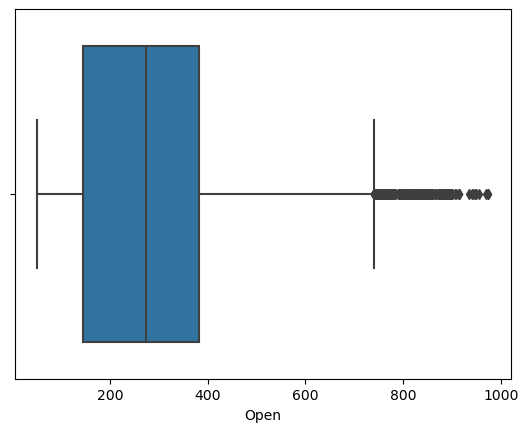

In [77]:
sb.boxplot(x=data['Open'])

<Axes: xlabel='High'>

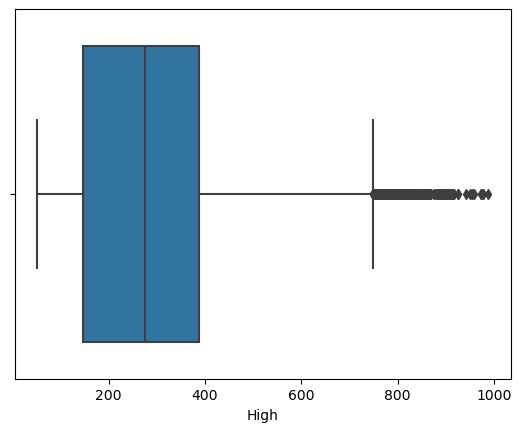

In [79]:
sb.boxplot(x=data['High'])

<Axes: xlabel='Low'>

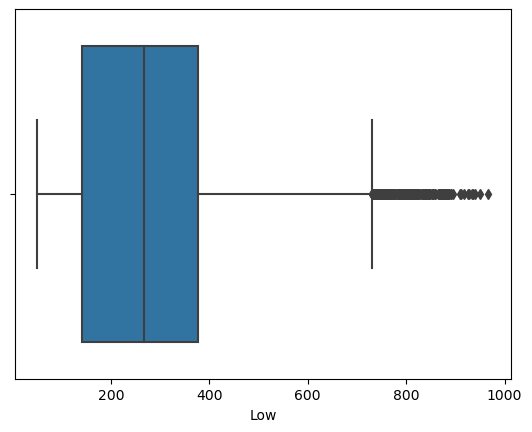

In [81]:
sb.boxplot(x=data['Low'])

<Axes: xlabel='Close'>

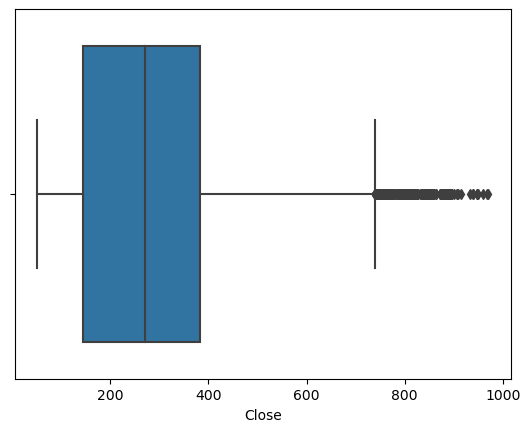

In [83]:
sb.boxplot(x=data['Close'])

<Axes: xlabel='Adj Close'>

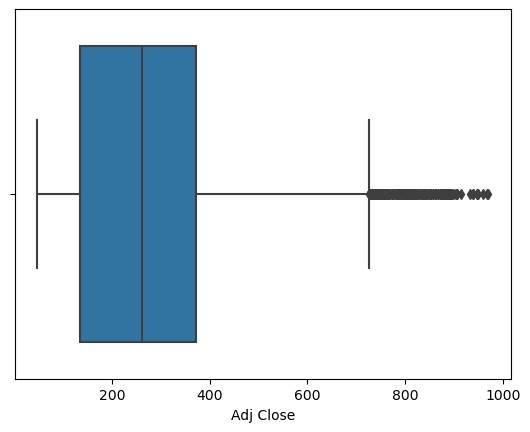

In [85]:
sb.boxplot(x=data['Adj Close'])

<Axes: xlabel='Volume'>

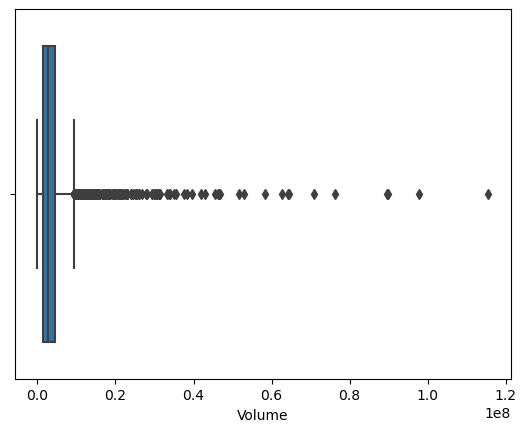

In [87]:
sb.boxplot(x=data['Volume'])

In [89]:
# Calculate IQR for numerical columns
iqr_values = {}
for col in ["Open", "Close", "Adj Close", "Low", "High", "Volume"]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[col] = IQR

iqr_values


{'Open': 238.43751125,
 'Close': 237.93750750000004,
 'Adj Close': 236.45071099999998,
 'Low': 235.7499925,
 'High': 240.36249550000002,
 'Volume': 3113893.0}

In [91]:
num_cols = ["Open", "Close", "Adj Close", "Low", "High", "Volume"]

# calculating Q1, Q3, and IQR
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculating bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Checking how many values are considered outliers per column
outliers_count = ((data[num_cols] < lower_bound) | (data[num_cols] > upper_bound)).sum()
print("Outliers per column:\n", outliers_count)

# Removing outliers
data_filtered = data[~((data[num_cols] < lower_bound) | (data[num_cols] > upper_bound)).any(axis=1)]
print("Original shape:", data.shape)
print("New shape after outlier removal:", data_filtered.shape)

Outliers per column:
 Open         281
Close        283
Adj Close    330
Low          279
High         292
Volume       288
dtype: int64
Original shape: (3842, 8)
New shape after outlier removal: (3299, 8)


In [100]:
import warnings
warnings.filterwarnings('ignore')

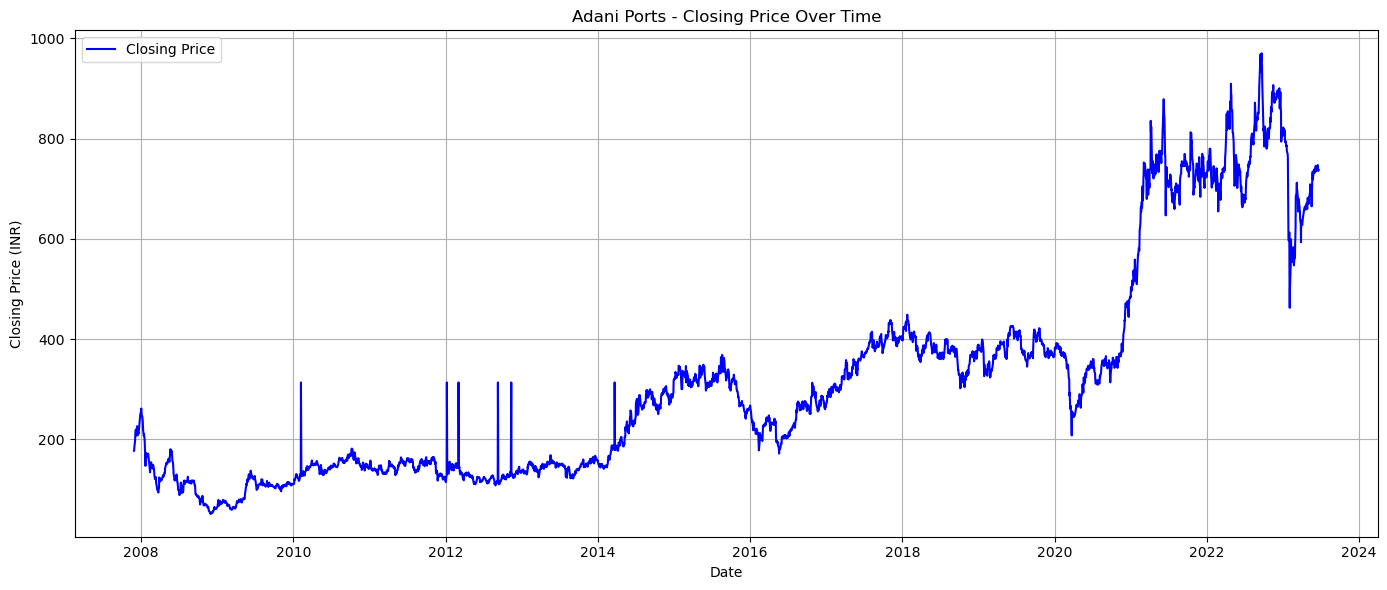

In [104]:
# How has the closing price changed over time?
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime and sort
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.sort_values('Date')
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Adani Ports - Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## It is the closing price trend of Adani Ports over time — you can see fluctuations and long-term growth, especially after 2020.

In [110]:
# Which days had the highest and lowest closing prices?
max_close_date = data.loc[data['Close'].idxmax(), ['Date', 'Close']]
min_close_date = data.loc[data['Close'].idxmin(), ['Date', 'Close']]


In [112]:
max_close_date

Date     2022-09-20 00:00:00
Close                 970.25
Name: 3656, dtype: object

In [114]:
min_close_date

Date     2008-11-28 00:00:00
Close                  51.59
Name: 246, dtype: object

## Highest & Lowest Closing Prices:
## 📈 Highest Close: ₹970.25 on 20th September 2022
## 📉 Lowest Close: ₹51.59 on 28th November 2008

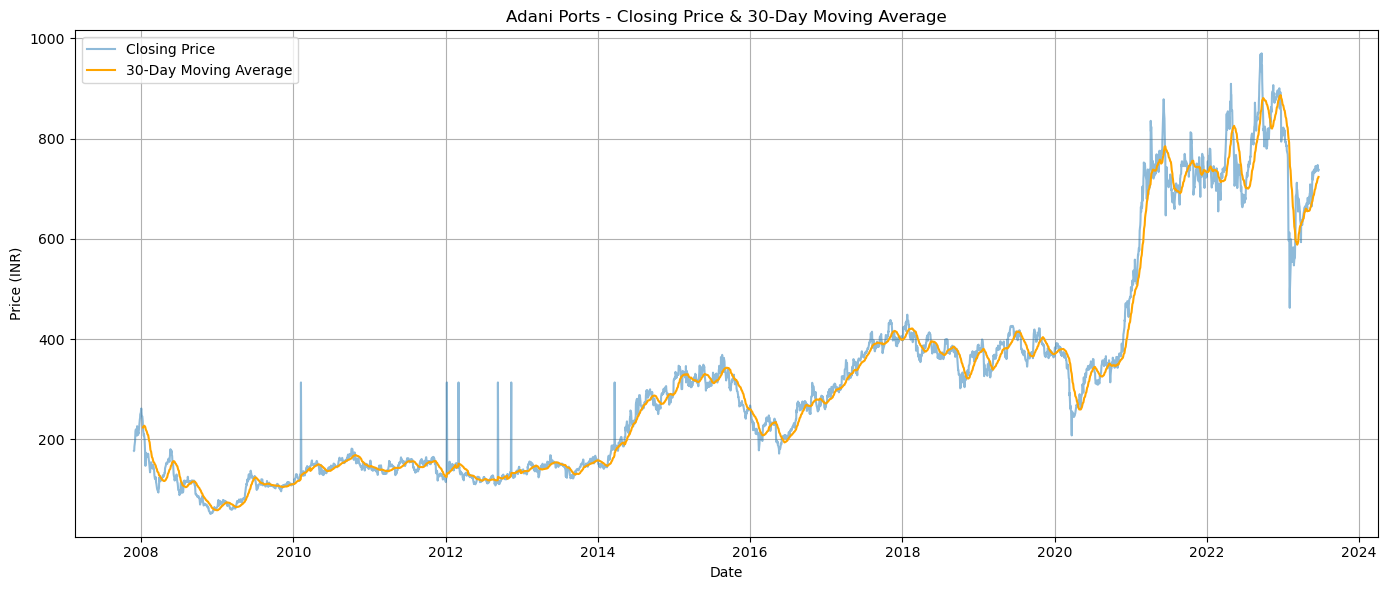

In [119]:
# What is the 30-day moving average trend?
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.sort_values('Date')

# Calculate 30-day moving average
data['30DMA'] = data['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', alpha=0.5)
plt.plot(data['Date'], data['30DMA'], label='30-Day Moving Average', color='orange')
plt.title('Adani Ports - Closing Price & 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## The 30 day Moving Average is 

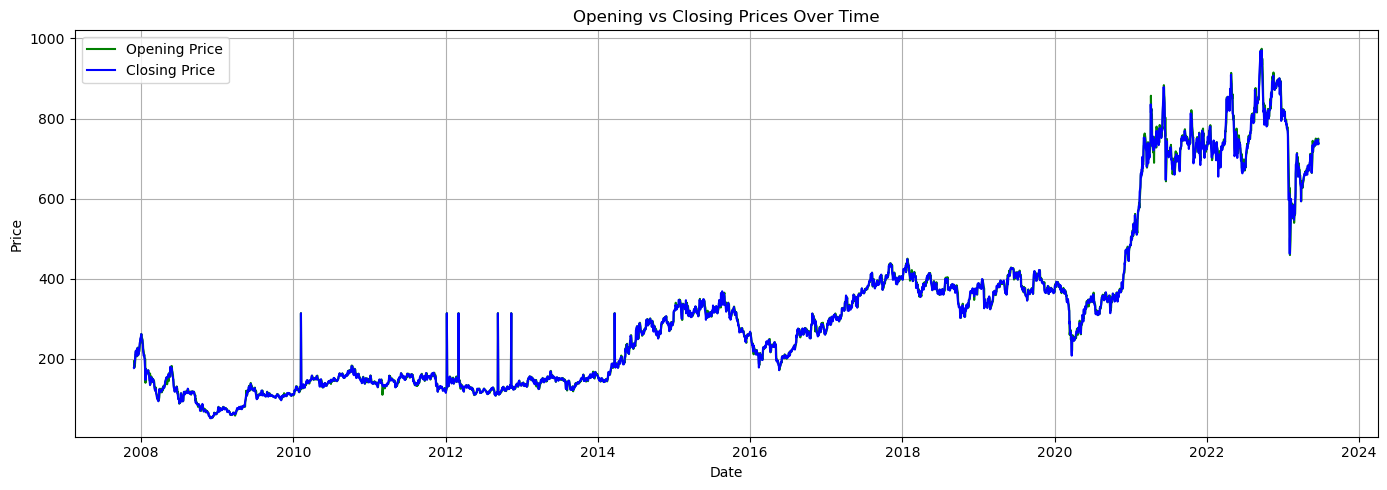

In [133]:
# How do opening and closing prices differ across time?
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Open vs Close
plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['Open'], label='Opening Price', color='green')
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title("Opening vs Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


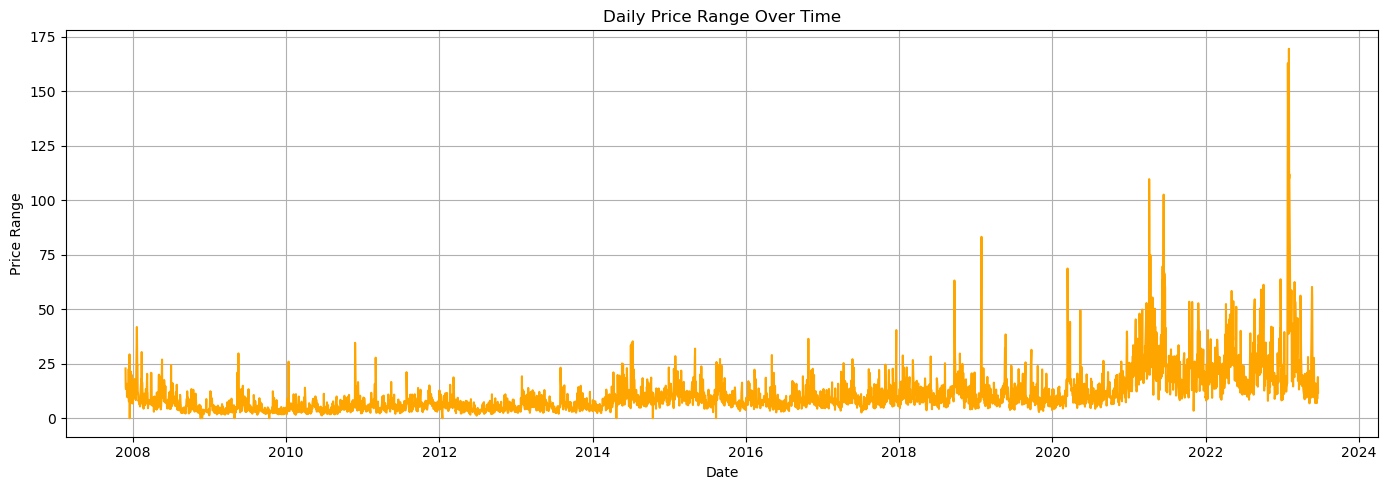

In [135]:
# # What is the daily price range (High - Low)?
# Calculate daily range
data['Range'] = data['High'] - data['Low']

plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['Range'], label='Daily Price Range (High - Low)', color='orange')
plt.title("Daily Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.grid(True)
plt.tight_layout()
plt.show()


In [139]:
# Which dates had the highest trading volumes?
# Top 5 dates with highest volume
top_volumes = data.sort_values(by='Volume', ascending=False).head(5)
print("Top 5 Trading Volume Dates:")
print(top_volumes[['Date', 'Volume']])


Top 5 Trading Volume Dates:
           Date       Volume
3749 2023-02-02  115517458.0
3295 2021-04-07   97717880.0
3340 2021-06-14   89771631.0
3750 2023-02-03   89662866.0
3344 2021-06-18   76266975.0


In [141]:
# Is there a correlation between trading volume and price movement?
# Calculate absolute daily price change
data['Price_Change'] = (data['Close'] - data['Open']).abs()

# Correlation
correlation = data['Volume'].corr(data['Price_Change'])
print(f"Correlation between trading volume and price movement: {correlation:.2f}")


Correlation between trading volume and price movement: 0.57


In [143]:
# What are the average trading volumes by month or year?
# By Month
data['Month'] = data['Date'].dt.to_period('M')
monthly_avg = data.groupby('Month')['Volume'].mean()

print("Average Trading Volume by Month:")
print(monthly_avg.tail(12))  # Show last 12 months


Average Trading Volume by Month:
Month
2022-07    2.889775e+06
2022-08    7.184144e+06
2022-09    8.975985e+06
2022-10    6.037980e+06
2022-11    7.775216e+06
2022-12    4.939233e+06
2023-01    1.100336e+07
2023-02    2.749163e+07
2023-03    1.479457e+07
2023-04    4.217417e+06
2023-05    7.968291e+06
2023-06    4.497070e+06
Freq: M, Name: Volume, dtype: float64


In [145]:
# By Year
data['Year'] = data['Date'].dt.year
yearly_avg = data.groupby('Year')['Volume'].mean()

print("Average Trading Volume by Year:")
print(yearly_avg)


Average Trading Volume by Year:
Year
2007    1.005805e+07
2008    2.479621e+06
2009    2.131027e+06
2010    1.993457e+06
2011    1.403072e+06
2012    1.308982e+06
2013    2.067523e+06
2014    3.745948e+06
2015    3.304444e+06
2016    4.817980e+06
2017    3.704095e+06
2018    3.364048e+06
2019    3.695747e+06
2020    5.146334e+06
2021    1.238627e+07
2022    6.022850e+06
2023    1.218736e+07
Name: Volume, dtype: float64


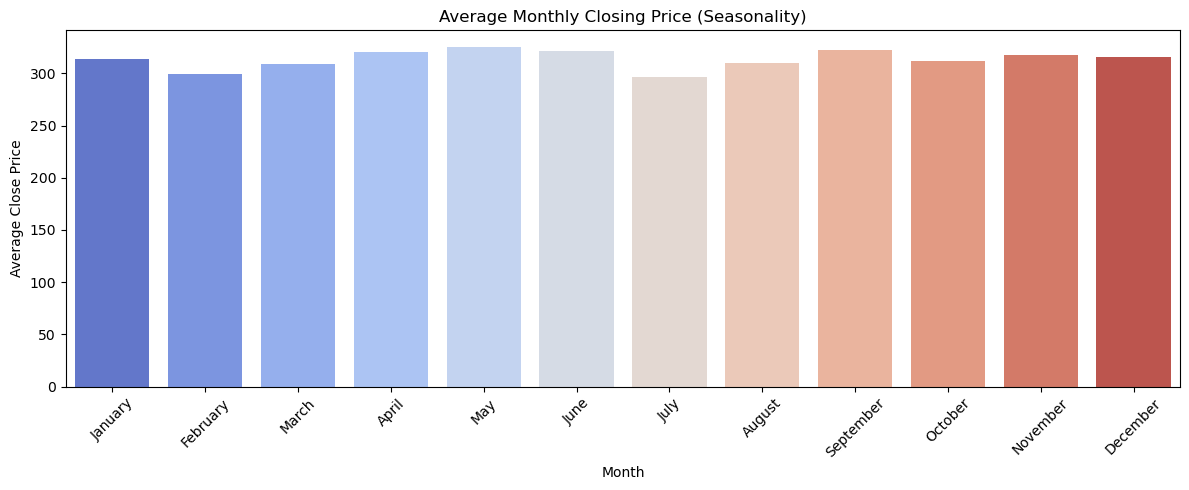

In [149]:
# Are there any seasonal patterns (monthly/quarterly) in the price data?
# 📅 Monthly Seasonality:
# Add month column
data['Month'] = data['Date'].dt.month_name()
monthly_avg_price = data.groupby('Month')['Close'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12, 5))
sb.barplot(x=monthly_avg_price.index, y=monthly_avg_price.values, palette='coolwarm')
plt.title("Average Monthly Closing Price (Seasonality)")
plt.ylabel("Average Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


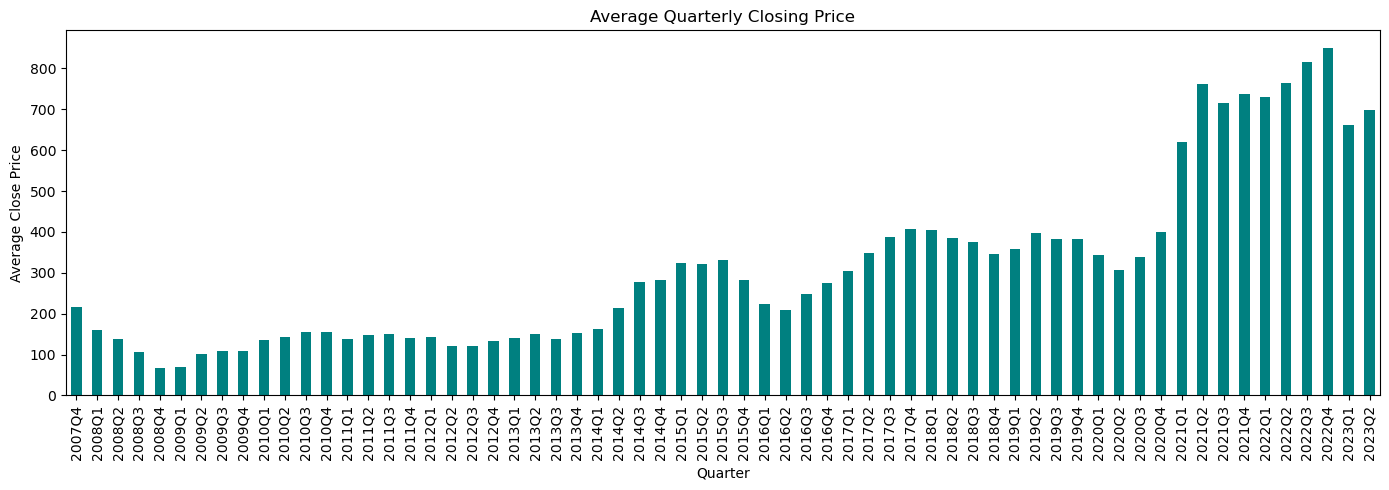

In [151]:
# 📆 Quarterly Seasonality:
# Create Quarter column
data['Quarter'] = data['Date'].dt.to_period('Q')
quarterly_avg_price = data.groupby('Quarter')['Close'].mean()

plt.figure(figsize=(14, 5))
quarterly_avg_price.plot(kind='bar', color='teal')
plt.title("Average Quarterly Closing Price")
plt.ylabel("Average Close Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


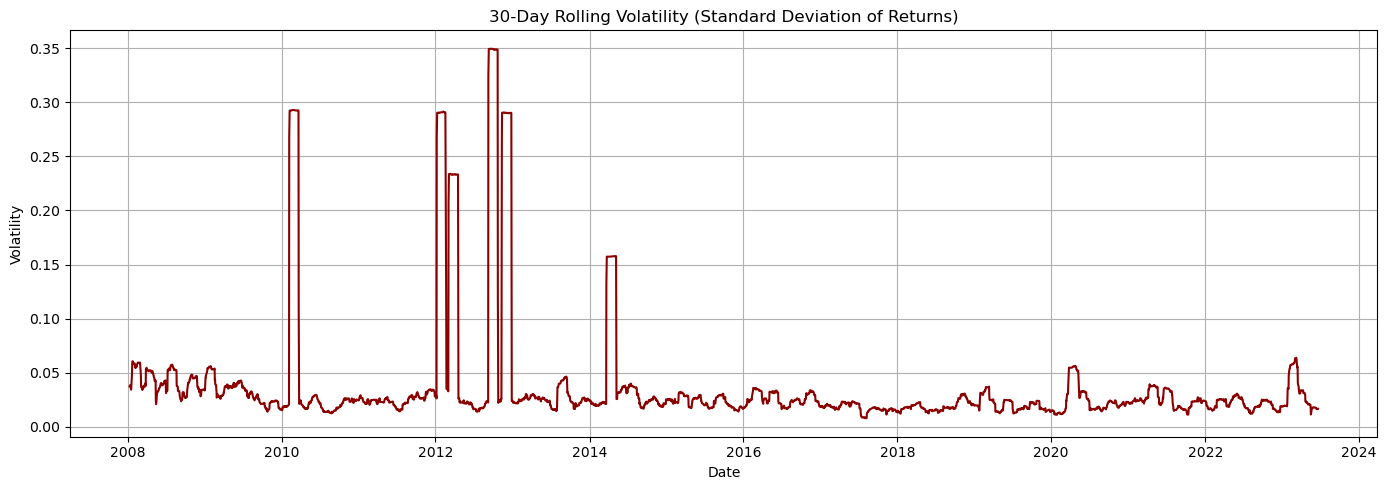

Overall Volatility (Standard Deviation of Returns): 0.0645


In [155]:
# How volatile is the stock over time (standard deviation of returns)?
# Calculate daily return %
data['Return'] = data['Close'].pct_change()

# Volatility (rolling std dev over 30 days)
data['Volatility'] = data['Return'].rolling(window=30).std()

plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['Volatility'], color='darkred')
plt.title("30-Day Rolling Volatility (Standard Deviation of Returns)")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print overall volatility
overall_vol = data['Return'].std()
print(f"Overall Volatility (Standard Deviation of Returns): {overall_vol:.4f}")


## Predictive Modeling:

In [164]:
# Can we predict the next day's closing price using current day's features (Open, High, Low, Volume)?
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data = data.sort_values('Date').reset_index(drop=True)
# 🧠 Feature Engineering: Technical Indicators
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['RSI'] = data['Close'].diff().apply(lambda x: max(x, 0)).rolling(14).mean() / \
            data['Close'].diff().abs().rolling(14).mean()
data['MACD'] = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()

In [166]:
# Can we classify whether the stock will go up or down the next day?
# (Binary classification: 1 if Close(t+1) > Close(t), else 0)
# 🎯 Targets
data['Target_Close'] = data['Close'].shift(-1)
data['Target_UpDown'] = (data['Target_Close'] > data['Close']).astype(int)
data = data.dropna()

In [172]:
# Can a regression model forecast future prices based on historical prices and volumes?
# 🧪 Features & Targets
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA20', 'RSI', 'MACD']
X = data[features]
y_reg = data['Target_Close']
y_clf = data['Target_UpDown']

In [184]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [186]:
# 🔀 Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)


In [232]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, classification_report
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [190]:
# 🔧 Regression Models
lr = LinearRegression().fit(X_train, y_reg_train)
rf = RandomForestRegressor().fit(X_train, y_reg_train)
xgb = XGBRegressor(eval_metric='rmse').fit(X_train, y_reg_train)


In [240]:
# How accurate are different ML models (Linear Regression, Random Forest, XGBoost) in predicting the stock price?
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestRegressor, BaggingClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier,
    BaggingRegressor, BaggingClassifier,
    AdaBoostClassifier
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score, classification_report
from sklearn.ensemble import IsolationForest

In [210]:
print("\n📈 Regression R² Scores:")
print("Linear Regression:", r2_score(y_reg_test, lr.predict(X_test)))
print("Random Forest:", r2_score(y_reg_test, rf.predict(X_test)))
print("XGBoost:", r2_score(y_reg_test, xgb.predict(X_test)))



📈 Regression R² Scores:
Linear Regression: 0.9969934435207911
Random Forest: 0.996459969678048
XGBoost: 0.9956522568188974


In [244]:
# Regression Models
reg_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "LightGBM Regressor": lgb.LGBMRegressor(),
    "CatBoost Regressor": cb.CatBoostRegressor(verbose=0),
    "Bagging Regressor": BaggingRegressor()
}

print("📈 REGRESSION MODEL SCORES (R²):")
for name, model in reg_models.items():
    model.fit(X_train, y_reg_train)
    y_pred = model.predict(X_test)
    print(f"{name}: {r2_score(y_reg_test, y_pred):.4f}")

📈 REGRESSION MODEL SCORES (R²):
Linear Regression: 0.9970
Decision Tree Regressor: 0.9935
Random Forest Regressor: 0.9963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3048, number of used features: 4
[LightGBM] [Info] Start training from score 314.600228
LightGBM Regressor: 0.9962
CatBoost Regressor: 0.9961
Bagging Regressor: 0.9964


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3048, number of used features: 4
[LightGBM] [Info] Start training from score 314.600228


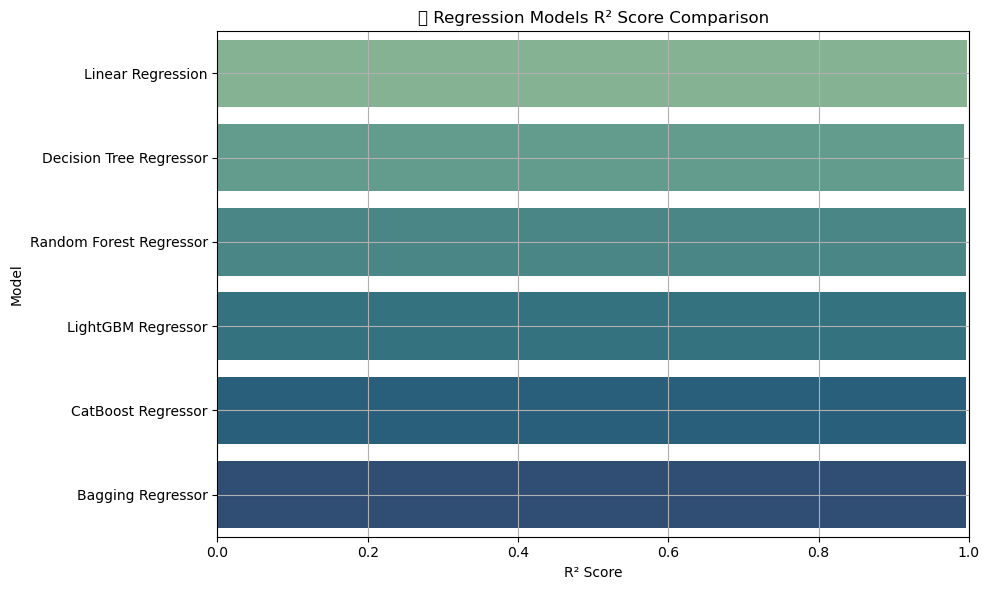

In [248]:
import seaborn as sns

# -------------------------------
# Regression Accuracy Comparison
# -------------------------------
reg_results = {}
for name, model in reg_models.items():
    model.fit(X_train, y_reg_train)
    pred = model.predict(X_test)
    reg_results[name] = r2_score(y_reg_test, pred)

# Plotting Regression Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(reg_results.values()), y=list(reg_results.keys()), palette="crest")
plt.title("📈 Regression Models R² Score Comparison")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [212]:
# 🔧 Classification Models
log_clf = LogisticRegression(max_iter=1000).fit(X_train, y_clf_train)
rf_clf = RandomForestClassifier().fit(X_train, y_clf_train)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_clf_train)

print("\n🔍 Classification Reports:")
print("Logistic Regression:\n", classification_report(y_clf_test, log_clf.predict(X_test)))
print("Random Forest:\n", classification_report(y_clf_test, rf_clf.predict(X_test)))
print("XGBoost:\n", classification_report(y_clf_test, xgb_clf.predict(X_test)))


🔍 Classification Reports:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.47      1.00      0.64       360

    accuracy                           0.47       763
   macro avg       0.24      0.50      0.32       763
weighted avg       0.22      0.47      0.30       763

Random Forest:
               precision    recall  f1-score   support

           0       0.52      0.53      0.53       403
           1       0.46      0.45      0.46       360

    accuracy                           0.49       763
   macro avg       0.49      0.49      0.49       763
weighted avg       0.49      0.49      0.49       763

XGBoost:
               precision    recall  f1-score   support

           0       0.52      0.49      0.51       403
           1       0.47      0.49      0.48       360

    accuracy                           0.49       763
   macro avg       0.49      0.49      0.49       763

In [246]:
# Classification Models
clf_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM Classifier": lgb.LGBMClassifier(),
    "CatBoost Classifier": cb.CatBoostClassifier(verbose=0),
    "Bagging Classifier": BaggingClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

print("\n🔍 CLASSIFICATION REPORTS (Stock Up/Down Prediction):")
for name, model in clf_models.items():
    model.fit(X_train, y_clf_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n", classification_report(y_clf_test, y_pred))


🔍 CLASSIFICATION REPORTS (Stock Up/Down Prediction):

Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.47      1.00      0.64       360

    accuracy                           0.47       763
   macro avg       0.24      0.50      0.32       763
weighted avg       0.22      0.47      0.30       763


Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       403
           1       0.48      0.47      0.48       360

    accuracy                           0.51       763
   macro avg       0.51      0.51      0.51       763
weighted avg       0.51      0.51      0.51       763


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.52      0.53      0.53       403
           1       0.47      0.46      0.46       360

    accuracy                           0.50      

[LightGBM] [Info] Number of positive: 1541, number of negative: 1507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3048, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505577 -> initscore=0.022311
[LightGBM] [Info] Start training from score 0.022311


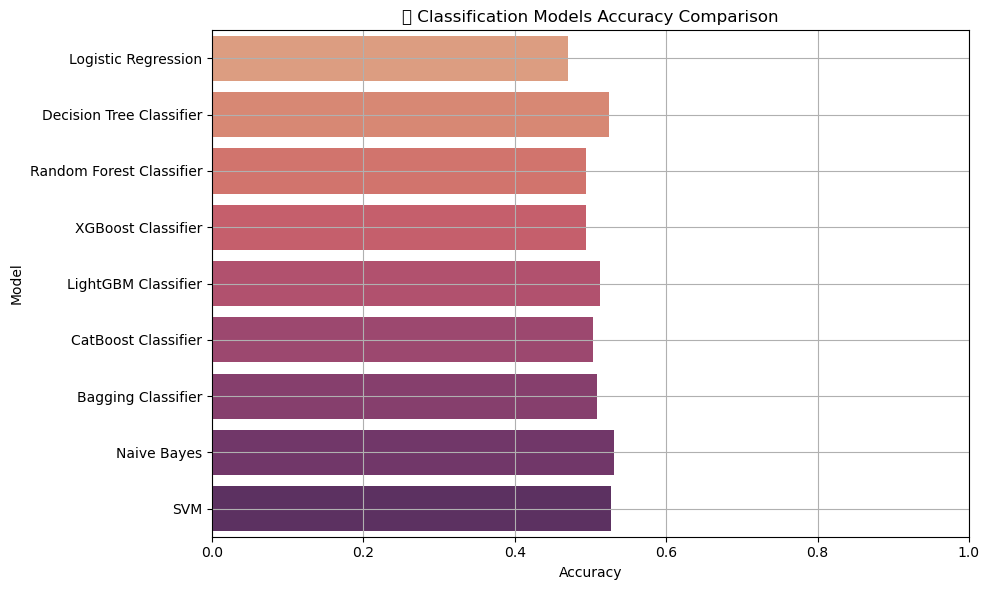

In [250]:
# Classification Accuracy Comparison
# -------------------------------
from sklearn.metrics import accuracy_score

clf_results = {}
for name, model in clf_models.items():
    model.fit(X_train, y_clf_train)
    pred = model.predict(X_test)
    clf_results[name] = accuracy_score(y_clf_test, pred)

# Plotting Classification Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(clf_results.values()), y=list(clf_results.keys()), palette="flare")
plt.title("🔍 Classification Models Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

## 💡 Feature Engineering-Based:

In [220]:
# which features (Open, High, Low, Volume, indicators) are most important for price prediction?
# 📊 Feature Importance
importances = rf.feature_importances_
for name, imp in zip(features, importances):
    print(f"{name}: {imp:.4f}")

Open: 0.0414
High: 0.6308
Low: 0.3269
Volume: 0.0008


## 🧪 Anomaly Detection:


In [218]:
# Can we detect unusual trading days (spikes, crashes, volume surges)?
# 🚨 Anomaly Detection in Volume
data['Z_Volume'] = (data['Volume'] - data['Volume'].mean()) / data['Volume'].std()
anomalies = data[np.abs(data['Z_Volume']) > 3]
print("\n🚨 Volume Anomalies (Top 10):")
print(anomalies[['Date', 'Volume', 'Z_Volume']].head(10))



🚨 Volume Anomalies (Top 10):
           Date      Volume  Z_Volume
323  2009-03-27  46210690.0  6.981635
571  2010-04-01  62604490.0  9.699264
1630 2014-07-02  29796852.0  4.260685
1853 2015-06-03  24022178.0  3.303407
1916 2015-08-31  30058587.0  4.304073
2078 2016-05-04  22904231.0  3.118083
2831 2019-05-23  23021274.0  3.137485
2958 2019-11-29  30111277.0  4.312808
3260 2021-02-12  24953701.0  3.457827
3263 2021-02-17  34868085.0  5.101352
